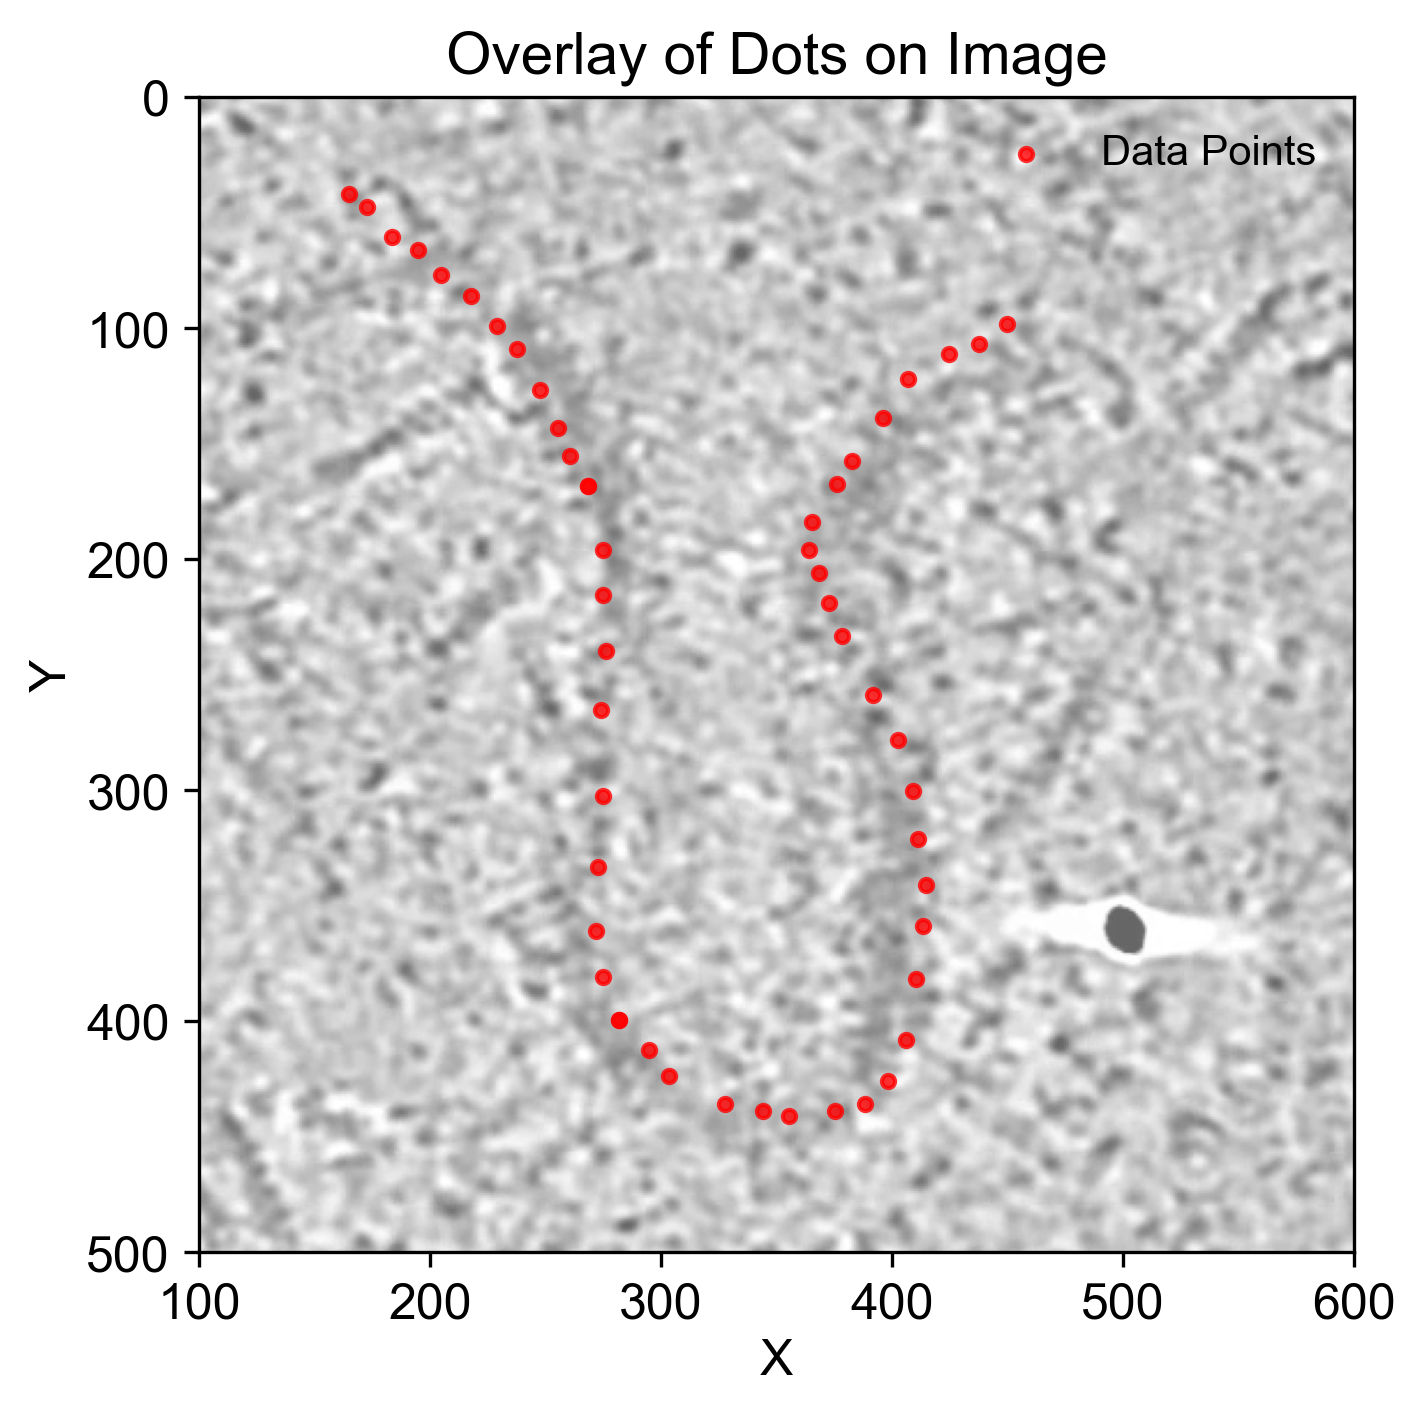

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    image = plt.imread(image_path)
    # If the image is in RGB(A), convert it to grayscale by taking only one channel
    if len(image.shape) == 3:
        image = image[:, :, 0]  # Assuming grayscale information is in the first channel
    # Normalize the image to make it whiter (increase brightness)
    image = (image - image.min()) / (image.max() - image.min()) * 255
    return image.astype(np.uint8)


def load_data(file_path):
    data = np.loadtxt(file_path, usecols=(1, 2, 3))
    filtered_data = data[data[:, 0] == 1]
    # filtered_data = data
    x = filtered_data[:, 1] * 0.6
    y = filtered_data[:, 2] * 0.6
    return x, y

def plot_dots(image, x, y, shift_x=0, shift_y=0, xlim=None, ylim=None):
    # Plot the image and overlay the dots
    fig, ax = plt.subplots(figsize=(10, 5))
    # ax.imshow(image, cmap='gray', vmin=0, vmax=200)
    ax.imshow(image, cmap='gray', alpha=0.6)

    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    
    # Apply the shift and plot the dots
    ax.scatter(x + shift_x, y + shift_y, color='red', s=10, alpha=0.8, label='Data Points')
    ax.set_title('Overlay of Dots on Image')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    plt.show()

# File paths for the image and data file
image_path = '/Users/atsushi/Library/Mobile Documents/com~apple~CloudDocs/simulation/akamatsu/actuator_ori/cme_example/raw_images/Membrane_2018June_Tomo26_CME_Invagination.png'
file_path = '/Users/atsushi/Library/Mobile Documents/com~apple~CloudDocs/simulation/akamatsu/actincme_dat/input/Membrane_2018June_Tomo26_CME_Invagination.txt'

# Load the image and data points
image = load_image(image_path)
x, y = load_data(file_path)

y = -y

x_shift = 765
y_shift = 940
scale = 1.1

x -= x_shift*0.6
y += y_shift*0.6

x *= scale/0.6
y *= scale/0.6

plot_dots(image, x, y, xlim = (100, 600), ylim=(500, 0))
